# Signal Detection Using Templates and Statistics
Elizabeth Kapelevich

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import interpolate

## Part I: PPT Slides
* Gravity
* General Relativity
* Gravitational Waves

## Part II: Demo
* Write a function returning `t, y` of a sine-gaussian wave
* Plot the default sine-gaussian wave
* Plot different sine-gaussian waves with different values of `a, f,` and $\sigma$ so audience understands how parameters affect wave
* Generate random noise
* Plot the random noise
* Plot the wave on top of the random noise and make the wave an obvious color so audience can see it
* Remove the obvious color so the wave is more difficult to find for the audience
* Show how increasing the amplitude of the noise can completely bury the wave so it's not visible
* Create the `integrator` and `cross_correlation` function
* Make an animation of the `cross_correlation` function sliding with the template across the noise to find the wave
* Plot the `cross_correlation` result and show that the peak is where the wave is found
* Show how changing parameters will affect the peak of `cross_correlation`

In [64]:
def sine_gaussian(amplitude, frequency, sigma, time_interval, t_start, t_end):
    
    """
    This function takes as input the amplitude,
    frequency, standard deviation, interval of
    time, and the bounds of time.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : frequency
    sigma : standard deviation
    time_interval : interval of time between each value
    t_start : initial time
    t_end : final time
    
    RETURNS:
    --------
    The time series for a wave of a sine-gaussian 
    function.
    """
    
    t_duration = t_end - t_start                                   # calculating duration of time
    time_stamps = t_duration / time_interval                       # finding number of time-stamps
    delta_T = t_duration / math.ceil(time_stamps)                  # creating new time intervals to allow array to reach end point

    t = np.arange(t_start, t_end + delta_T, delta_T)               # setting up array from initial to final time in increments of delta t
    t_mean = (t_start + t_end) / 2                                 # finding mean of time for sine-gaussian equation
    
    S = amplitude*np.sin(2*np.pi*frequency*t)*np.exp((-(t - t_mean)**2)/(2*sigma)) # sine-gaussian equation

    return t, S, delta_T

In [65]:
amplitude = 1
frequency = 2
sigma = 0.1
time_interval = 0.012
t_start = 5
t_end = 7

In [66]:
time_wave, wave, interval = sine_gaussian(amplitude, frequency, sigma, time_interval, t_start, t_end)

Text(0.5, 1.0, 'Sine Gaussian Wave')

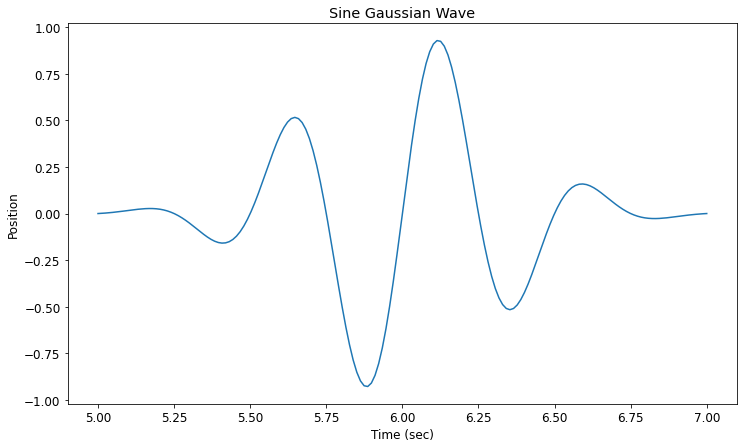

In [67]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Sine Gaussian Wave")

In [40]:
def noise_function(t_start, t_end, time_interval):
    """
    This function will take as input the boundaries of a time stamp
    from some noise and the interval between each value.
    
    INPUT:
    ------
    t_0 : start time of noise
    t_end : end time of noise
    interval : interval of time between each value
    
    RETURNS:
    --------
    The time series for random noise.
    
    """
    t_duration = t_end - t_start                          # calculating duration of time
    time_stamps = t_duration / time_interval              # finding number of time-stamps
    delta_T = t_duration / math.ceil(time_stamps)         # creating new time intervals to allow array to reach end point

    t = np.arange(t_start, t_end + delta_T, delta_T)      # setting up array from initial to final time in increments of delta t
    
    noise = -1 + 2 * np.random.random(len(t))             # random values with same length as t
    
    return t, noise, delta_T

In [50]:
t_start = 0
t_end = 10
time_interval = 0.0088

In [51]:
time_noise, noise, delta_T = noise_function(t_start, t_end, time_interval)

Text(0.5, 1.0, 'Random Noise')

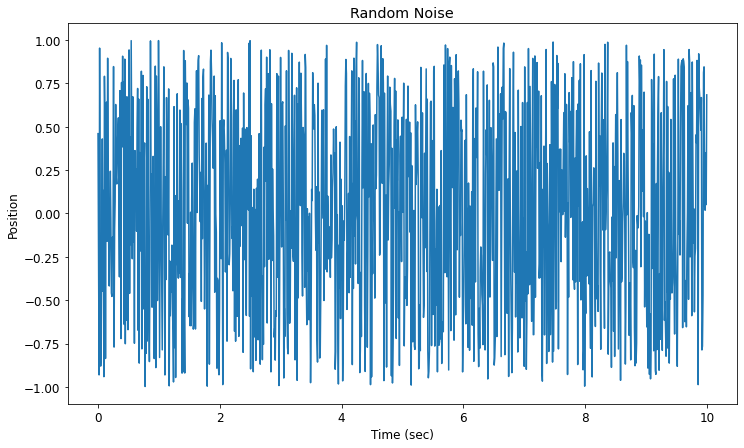

In [52]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_noise, noise)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Random Noise")

In [53]:
def finaldata(amplitude, frequency, sigma, time_interval, signal_start, signal_end, noise_start, noise_end):
    """
    This function will take as input the amplitude, time boundaries
    of the signal and noise, interval between their values, the
    frequency, and standard deviation.
    
    INPUT:
    ------
    amplitude : amplitude
    frequency : frequency
    sigma : standard deviation
    time_interval : interval of time between each value
    signal_start : start time of signal
    signal_end : end time of signal
    noise_start : start time of noise
    noise_end : end time of noise
    
    RETURNS:
    --------
    The times and positions of signal and noise combined.
    """
    
    time_signal, signal_values, signal_interval = sine_gaussian(amplitude, frequency, sigma, 
                                                                time_interval, signal_start, signal_end)
    time_noise, noise_values, noise_interval = noise_function(noise_start, noise_end, time_interval)
    
    s = interpolate.interp1d(time_signal, signal_values)
    
    index1 = time_noise > time_signal[0]                          # boolean = False before signal in noise time-series
    index2 = time_noise < time_signal[-1]                         # boolean = False after signal in noise time-series
    time_intersect = index1*index2                                # multiplying arrays into one array of booleans
    
    zeroes = np.zeros_like(noise_values)                          # create an array of zeroes same length as noise values
    signal_time_stamps = time_noise[time_intersect]
    signal = s(signal_time_stamps)                                # interpolating signal time stamps onto signal values

    data_in_signal = noise_values[time_intersect] + signal        # embedding signal in noise
    data_before_signal = noise_values[index2*(~time_intersect)]   # prepping to graph noise before signal
    data_after_signal = noise_values[index1*(~time_intersect)]    # prepping to graph noise after signal

    alldata = np.hstack((data_before_signal, data_in_signal, data_after_signal)) # combining the three arrays
    
    return (time_noise, alldata)

In [68]:
amplitude = 1
signal_start = 5
signal_end = 7
noise_start = 0
noise_end = 10
time_interval = 0.012
frequency = 5
sigma = 0.1
times, alldata = finaldata(amplitude, frequency, sigma, time_interval, signal_start, signal_end, noise_start, noise_end)

Text(0.5, 1.0, 'Setting Signal on Top of Noise')

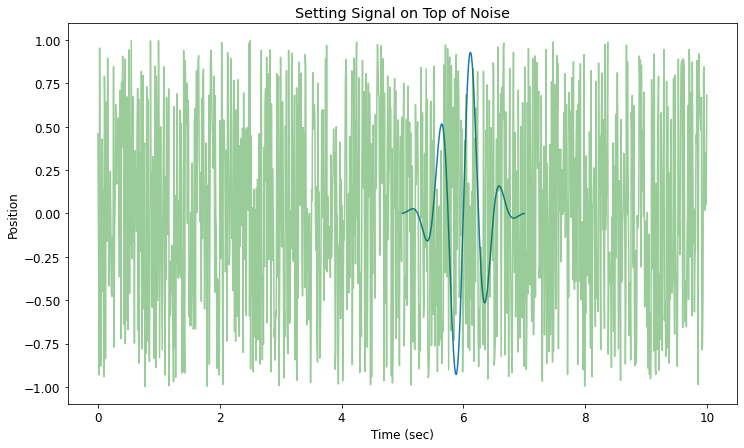

In [69]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(time_wave, wave)
plt.plot(time_noise, noise, 'green', alpha=0.4)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Setting Signal on Top of Noise")

Text(0.5, 1.0, 'Embedding Signal Within Noise Using Markers')

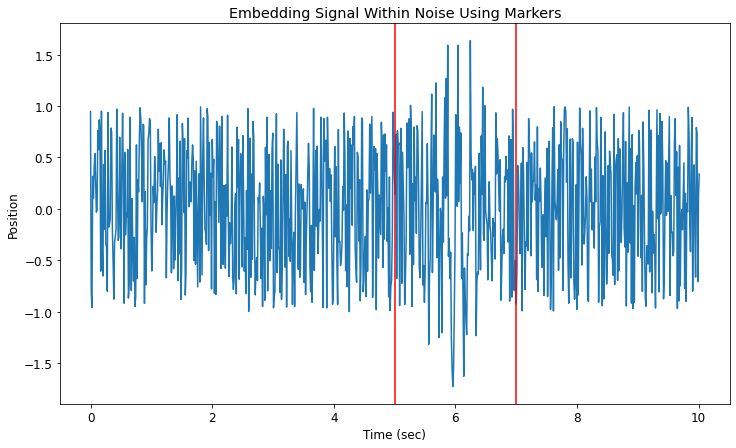

In [62]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, alldata)
ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([5, 5], ylim, 'r-')
plt.plot([7, 7], ylim, 'r-')
plt.ylim(ylim)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Embedding Signal Within Noise Using Markers")

Text(0.5, 1.0, 'Embedding Signal Within Noise')

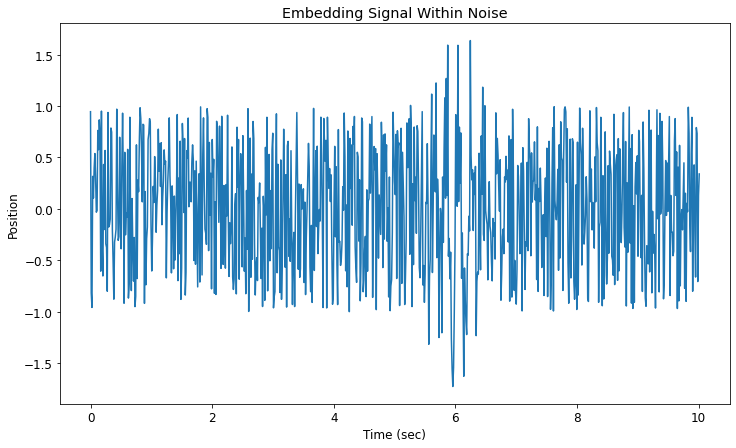

In [63]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,7))
plt.plot(times, alldata)
plt.xlabel("Time (sec)")
plt.ylabel("Position")
plt.title("Embedding Signal Within Noise")